In [ ]:
! pip install -U sentence-transformers

     |████████████████████████████████| 79 kB 4.3 MB/s 
     |████████████████████████████████| 4.0 MB 19.4 MB/s 
     |████████████████████████████████| 1.2 MB 44.6 MB/s 
     |████████████████████████████████| 77 kB 4.0 MB/s 
     |████████████████████████████████| 6.6 MB 52.8 MB/s 
     |████████████████████████████████| 596 kB 70.4 MB/s 
     |████████████████████████████████| 895 kB 68.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=6bfd84c7427fbcf324b52ee147e2d3b8ea2242d3b137767febc6e32cf473e892
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
cur_path = "drive/MyDrive/FinalProject/data"
os.chdir(cur_path)
!pwd

/content/drive/.shortcut-targets-by-id/1Aq14Ege2InamRshAaFfayoeXXisIiVCw/FinalProject/data


In [ ]:
from numpy import dot
from numpy.linalg import norm

## load data

In [ ]:
import pandas as pd

In [ ]:
product_df=pd.read_csv("product_catalogue-v0.2.csv")
product_df

,product_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale
0,B079VKKJN7,"11 Degrees de los Hombres Playera con Logo, Ne...",Esta playera con el logo de la marca Carrier d...,11 Degrees Negro Playera con logo\nA estrenar ...,11 Degrees,Negro,es
1,B079Y9VRKS,Camiseta Eleven Degrees Core TS White (M),NaN,NaN,11 Degrees,Blanco,es
2,B07DP4LM9H,11 Degrees de los Hombres Core Pull Over Hoodi...,La sudadera con capucha Core Pull Over de 11 G...,11 Degrees Azul Core Pull Over Hoodie\nA estre...,11 Degrees,Azul,es
3,B07G37B9HP,11 Degrees Poli Panel Track Pant XL Black,NaN,NaN,11 Degrees,NaN,es
4,B07LCTGDHY,11 Degrees Gorra Trucker Negro OSFA (Talla úni...,NaN,NaN,11 Degrees,Negro (,es
...,...,...,...,...,...,...,...
1815211,B09FJYBVKS,スポーツブラ 揺れない ヨガウェア レディース トップス 通気性 ナイトブラ スポーツブラジ...,<p>【注意事項】</p><p>※商品内容以外のアクセサリー・小物等は付属しません.</p>...,シンプルのデザインで合わせやすいです。コート、半袖、シャツを合わせて、家で着てもいい、寝てい...,Doworspaw,ベージュ,jp
1815212,B09FTJ3S1N,ブラジャー レディース 補正ブラ Gabrioir 揺れない 大きいサイズ バストアップ美胸...,<p>【配送】</p><p>普通には2-3日後出荷できますが。出荷した後15-25日ぐらい届...,【いろんな場合に適用】軽い運動時、家事、外出、長時間移動、温泉旅行などに活用なセクシルームブ...,Gabrioir,パープル,jp
1815213,B09G72LDQZ,レディース ブラジャー 補正ブラ トップス Gabrioir 大きいサイズ 揺れない 脇高設...,<p>【配送】</p><p>普通には2-3日後出荷できますが。出荷した後15-25日ぐらい届...,【いろんな場合に適用】軽い運動時、家事、外出、長時間移動、温泉旅行などに活用なセクシルームブ...,Gabrioir,ベージュ,jp
1815214,B09GBGRTPB,ナイトブラ ノンワイヤーブラ ブラジャー レディース Gabrioir 大きいサイズ パット...,<p>【配送】</p><p>普通には2-3日後出荷できますが。出荷した後15-25日ぐらい届...,【いろんな場合に適用】軽い運動時、家事、外出、長時間移動、温泉旅行などに活用なセクシルームブ...,Gabrioir,パープル,jp


In [ ]:
query_df=pd.read_csv("task2/train-v0.2.csv")
query_df

,example_id,query,product_id,query_locale,esci_label
0,0,11 degrees,B079VKKJN7,es,exact
1,1,11 degrees,B079Y9VRKS,es,exact
2,2,11 degrees,B07D2DDCZH,es,exact
3,3,11 degrees,B07DP4LM9H,es,exact
4,4,11 degrees,B07G37B9HP,es,exact
...,...,...,...,...,...
1834739,1834739,針なしほっちきす,B08XGQ9RH7,jp,substitute
1834740,1834740,針なしほっちきす,B0987RGRF2,jp,exact
1834741,1834741,針なしほっちきす,B099NFJWP6,jp,exact
1834742,1834742,針なしほっちきす,B09F3B413J,jp,exact


In [ ]:
whole_df=product_df.join(query_df,how="left",lsuffix="product_id",rsuffix="product_id")
whole_df

,product_idproduct_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale,example_id,query,product_idproduct_id,query_locale,esci_label
0,B079VKKJN7,"11 Degrees de los Hombres Playera con Logo, Ne...",Esta playera con el logo de la marca Carrier d...,11 Degrees Negro Playera con logo\nA estrenar ...,11 Degrees,Negro,es,0,11 degrees,B079VKKJN7,es,exact
1,B079Y9VRKS,Camiseta Eleven Degrees Core TS White (M),NaN,NaN,11 Degrees,Blanco,es,1,11 degrees,B079Y9VRKS,es,exact
2,B07DP4LM9H,11 Degrees de los Hombres Core Pull Over Hoodi...,La sudadera con capucha Core Pull Over de 11 G...,11 Degrees Azul Core Pull Over Hoodie\nA estre...,11 Degrees,Azul,es,2,11 degrees,B07D2DDCZH,es,exact
3,B07G37B9HP,11 Degrees Poli Panel Track Pant XL Black,NaN,NaN,11 Degrees,NaN,es,3,11 degrees,B07DP4LM9H,es,exact
4,B07LCTGDHY,11 Degrees Gorra Trucker Negro OSFA (Talla úni...,NaN,NaN,11 Degrees,Negro (,es,4,11 degrees,B07G37B9HP,es,exact
...,...,...,...,...,...,...,...,...,...,...,...,...
1815211,B09FJYBVKS,スポーツブラ 揺れない ヨガウェア レディース トップス 通気性 ナイトブラ スポーツブラジ...,<p>【注意事項】</p><p>※商品内容以外のアクセサリー・小物等は付属しません.</p>...,シンプルのデザインで合わせやすいです。コート、半袖、シャツを合わせて、家で着てもいい、寝てい...,Doworspaw,ベージュ,jp,1815211,‪脳を鍛えるには運動しかない,4295402125,jp,substitute
1815212,B09FTJ3S1N,ブラジャー レディース 補正ブラ Gabrioir 揺れない 大きいサイズ バストアップ美胸...,<p>【配送】</p><p>普通には2-3日後出荷できますが。出荷した後15-25日ぐらい届...,【いろんな場合に適用】軽い運動時、家事、外出、長時間移動、温泉旅行などに活用なセクシルームブ...,Gabrioir,パープル,jp,1815212,‪脳を鍛えるには運動しかない,4296101625,jp,irrelevant
1815213,B09G72LDQZ,レディース ブラジャー 補正ブラ トップス Gabrioir 大きいサイズ 揺れない 脇高設...,<p>【配送】</p><p>普通には2-3日後出荷できますが。出荷した後15-25日ぐらい届...,【いろんな場合に適用】軽い運動時、家事、外出、長時間移動、温泉旅行などに活用なセクシルームブ...,Gabrioir,ベージュ,jp,1815213,‪脳を鍛えるには運動しかない,4414304229,jp,irrelevant
1815214,B09GBGRTPB,ナイトブラ ノンワイヤーブラ ブラジャー レディース Gabrioir 大きいサイズ パット...,<p>【配送】</p><p>普通には2-3日後出荷できますが。出荷した後15-25日ぐらい届...,【いろんな場合に適用】軽い運動時、家事、外出、長時間移動、温泉旅行などに活用なセクシルームブ...,Gabrioir,パープル,jp,1815214,‪脳を鍛えるには運動しかない,4478004536,jp,irrelevant


In [ ]:
whole_df["em_title"]=""
whole_df["em_disc"]=""
whole_df["em_bullet"]=""
whole_df["em_brand"]=""
whole_df["em_color"]=""
whole_df["em_query"]=""
whole_df

,product_idproduct_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale,example_id,query,product_idproduct_id,query_locale,esci_label,em_title,em_disc,em_bullet,em_brand,em_color,em_query
0,B079VKKJN7,"11 Degrees de los Hombres Playera con Logo, Ne...",Esta playera con el logo de la marca Carrier d...,11 Degrees Negro Playera con logo\nA estrenar ...,11 Degrees,Negro,es,0,11 degrees,B079VKKJN7,es,exact,,,,,,
1,B079Y9VRKS,Camiseta Eleven Degrees Core TS White (M),NaN,NaN,11 Degrees,Blanco,es,1,11 degrees,B079Y9VRKS,es,exact,,,,,,
2,B07DP4LM9H,11 Degrees de los Hombres Core Pull Over Hoodi...,La sudadera con capucha Core Pull Over de 11 G...,11 Degrees Azul Core Pull Over Hoodie\nA estre...,11 Degrees,Azul,es,2,11 degrees,B07D2DDCZH,es,exact,,,,,,
3,B07G37B9HP,11 Degrees Poli Panel Track Pant XL Black,NaN,NaN,11 Degrees,NaN,es,3,11 degrees,B07DP4LM9H,es,exact,,,,,,
4,B07LCTGDHY,11 Degrees Gorra Trucker Negro OSFA (Talla úni...,NaN,NaN,11 Degrees,Negro (,es,4,11 degrees,B07G37B9HP,es,exact,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815211,B09FJYBVKS,スポーツブラ 揺れない ヨガウェア レディース トップス 通気性 ナイトブラ スポーツブラジ...,<p>【注意事項】</p><p>※商品内容以外のアクセサリー・小物等は付属しません.</p>...,シンプルのデザインで合わせやすいです。コート、半袖、シャツを合わせて、家で着てもいい、寝てい...,Doworspaw,ベージュ,jp,1815211,‪脳を鍛えるには運動しかない,4295402125,jp,substitute,,,,,,
1815212,B09FTJ3S1N,ブラジャー レディース 補正ブラ Gabrioir 揺れない 大きいサイズ バストアップ美胸...,<p>【配送】</p><p>普通には2-3日後出荷できますが。出荷した後15-25日ぐらい届...,【いろんな場合に適用】軽い運動時、家事、外出、長時間移動、温泉旅行などに活用なセクシルームブ...,Gabrioir,パープル,jp,1815212,‪脳を鍛えるには運動しかない,4296101625,jp,irrelevant,,,,,,
1815213,B09G72LDQZ,レディース ブラジャー 補正ブラ トップス Gabrioir 大きいサイズ 揺れない 脇高設...,<p>【配送】</p><p>普通には2-3日後出荷できますが。出荷した後15-25日ぐらい届...,【いろんな場合に適用】軽い運動時、家事、外出、長時間移動、温泉旅行などに活用なセクシルームブ...,Gabrioir,ベージュ,jp,1815213,‪脳を鍛えるには運動しかない,4414304229,jp,irrelevant,,,,,,
1815214,B09GBGRTPB,ナイトブラ ノンワイヤーブラ ブラジャー レディース Gabrioir 大きいサイズ パット...,<p>【配送】</p><p>普通には2-3日後出荷できますが。出荷した後15-25日ぐらい届...,【いろんな場合に適用】軽い運動時、家事、外出、長時間移動、温泉旅行などに活用なセクシルームブ...,Gabrioir,パープル,jp,1815214,‪脳を鍛えるには運動しかない,4478004536,jp,irrelevant,,,,,,


In [ ]:
es_whole_df=whole_df[whole_df["product_locale"]=="es"]
es_whole_df

,product_idproduct_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale,example_id,query,product_idproduct_id,query_locale,esci_label,em_title,em_disc,em_bullet,em_brand,em_color,em_query
0,B079VKKJN7,"11 Degrees de los Hombres Playera con Logo, Ne...",Esta playera con el logo de la marca Carrier d...,11 Degrees Negro Playera con logo\nA estrenar ...,11 Degrees,Negro,es,0,11 degrees,B079VKKJN7,es,exact,,,,,,
1,B079Y9VRKS,Camiseta Eleven Degrees Core TS White (M),NaN,NaN,11 Degrees,Blanco,es,1,11 degrees,B079Y9VRKS,es,exact,,,,,,
2,B07DP4LM9H,11 Degrees de los Hombres Core Pull Over Hoodi...,La sudadera con capucha Core Pull Over de 11 G...,11 Degrees Azul Core Pull Over Hoodie\nA estre...,11 Degrees,Azul,es,2,11 degrees,B07D2DDCZH,es,exact,,,,,,
3,B07G37B9HP,11 Degrees Poli Panel Track Pant XL Black,NaN,NaN,11 Degrees,NaN,es,3,11 degrees,B07DP4LM9H,es,exact,,,,,,
4,B07LCTGDHY,11 Degrees Gorra Trucker Negro OSFA (Talla úni...,NaN,NaN,11 Degrees,Negro (,es,4,11 degrees,B07G37B9HP,es,exact,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510154,B08Z8D7WDF,"2Pcs Organizador de Cosméticos Transparente, O...",<b>Característica:</b><br> - La caja de almace...,【Organiza Su Tocador】 Puedes poner organizador...,LuluDa,NaN,es,1510154,4x polo shirts for men big and tall,B07HRF659M,us,exact,,,,,,
1510155,B091B28RX1,"Porta Brochas De Maquillaje, Senteen Soporte B...",<br> -Características: <br> -1. La caja de alm...,【Material transparente】-El cubo de almacenamie...,Senteen,Transparente,es,1510155,4x polo shirts for men big and tall,B07HRFSNZW,us,exact,,,,,,
1510156,B0925MCJHV,LZYANG Bolsa Organizadora De Brochas De Maquil...,Perfecto para otros bolsos o ideal para viajes...,Materiales de alta calidad: la bolsa para cepi...,LZYANG,Negro,es,1510156,4x polo shirts for men big and tall,B07HRHP374,us,exact,,,,,,
1510157,B092M3XNXL,Organizador de Brochas de Maquillaje de Crista...,<b> Accesorios perfectos para la sencillez mod...,❃ Selección de material de alta calidad: está ...,QWEF,Dorado,es,1510157,4x polo shirts for men big and tall,B07JBRGFH4,us,substitute,,,,,,


get sample 

In [ ]:
es_whole_df=es_whole_df.reset_index()

In [ ]:
es_whole_df=es_whole_df.iloc[0:80000,:]

In [ ]:
es_whole_df

,index,product_idproduct_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale,example_id,query,product_idproduct_id,query_locale,esci_label,em_title,em_disc,em_bullet,em_brand,em_color,em_query
0,0,B079VKKJN7,"11 Degrees de los Hombres Playera con Logo, Ne...",Esta playera con el logo de la marca Carrier d...,11 Degrees Negro Playera con logo\nA estrenar ...,11 Degrees,Negro,es,0,11 degrees,B079VKKJN7,es,exact,,,,,,
1,1,B079Y9VRKS,Camiseta Eleven Degrees Core TS White (M),NaN,NaN,11 Degrees,Blanco,es,1,11 degrees,B079Y9VRKS,es,exact,,,,,,
2,2,B07DP4LM9H,11 Degrees de los Hombres Core Pull Over Hoodi...,La sudadera con capucha Core Pull Over de 11 G...,11 Degrees Azul Core Pull Over Hoodie\nA estre...,11 Degrees,Azul,es,2,11 degrees,B07D2DDCZH,es,exact,,,,,,
3,3,B07G37B9HP,11 Degrees Poli Panel Track Pant XL Black,NaN,NaN,11 Degrees,NaN,es,3,11 degrees,B07DP4LM9H,es,exact,,,,,,
4,4,B07LCTGDHY,11 Degrees Gorra Trucker Negro OSFA (Talla úni...,NaN,NaN,11 Degrees,Negro (,es,4,11 degrees,B07G37B9HP,es,exact,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,B09J99XSJG,HP Top ZBook 15 / Intel Core i7-4710MQ / 8 GB ...,NaN,HP ZBook 15 G2 Mobile Workstation – Core i7 47...,HP,NaN,es,79995,placa conmemorativa para arbol,B07KZQBDTY,es,exact,,,,,,
79996,79996,B07DCXXD5F,Lenovo Yoga 920 - Portátil táctil convertible ...,NaN,"Pantalla táctil convertíble de 13.9"" UHD 3840x...",Lenovo,Negro,es,79996,placa conmemorativa para arbol,B07TZHPG94,es,exact,,,,,,
79997,79997,B083M9YBBL,"Lenovo ThinkPad E15 - Portátil 15.6"" FullHD (I...",NaN,"Pantalla de 15.6"" FullHD 1920x1080 píxeles, IP...",Lenovo,NaN,es,79997,placa conmemorativa para arbol,B07Y9XCS74,es,exact,,,,,,
79998,79998,B08V21TB7P,Lenovo IdeaPad 5 Pro Gen 6 - Ordenador Portáti...,NaN,"Pantalla de 14"" 2.8K, 2880x1800 pixeles, IPS, ...",Lenovo,Gris,es,79998,placa conmemorativa para arbol,B07Y9XK1Z2,es,exact,,,,,,


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('lewtun/roberta-base-bne-finetuned-amazon_reviews_multi',device=0)


Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/752 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/509k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.25k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.67k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/lewtun_roberta-base-bne-finetuned-amazon_reviews_multi were not used when initializing RobertaModel: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at /root/.cache/torch/sentence_transformers/lewtun_roberta-base-bne-finetuned-amazon_reviews_multi and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.poole

In [ ]:
def get_sim_score(embeddings):
  result = dot(embeddings[0], embeddings[1])/(norm(embeddings[0])*norm(embeddings[1]))
  return result

In [ ]:
es_whole_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 80000 non-null  int64 
 1   product_idproduct_id  80000 non-null  object
 2   product_title         79998 non-null  object
 3   product_description   42976 non-null  object
 4   product_bullet_point  67017 non-null  object
 5   product_brand         77040 non-null  object
 6   product_color_name    51978 non-null  object
 7   product_locale        80000 non-null  object
 8   example_id            80000 non-null  int64 
 9   query                 80000 non-null  object
 10  product_idproduct_id  80000 non-null  object
 11  query_locale          80000 non-null  object
 12  esci_label            80000 non-null  object
 13  em_title              80000 non-null  object
 14  em_disc               80000 non-null  object
 15  em_bullet             80000 non-null

## Train model

In [ ]:
for index, row in es_whole_df.iterrows():
  title=[row["product_title"],row["query"]]
  desc=[row["product_description"],row["query"]]
  bullet=[row["product_bullet_point"],row["query"]]
  brand=[row["product_brand"],row["query"]]
  color=[row["product_color_name"],row["query"]]

  embeddings_title = model.encode(title)
  embeddings_desc = model.encode(desc)
  embeddings_bullet = model.encode(bullet)
  embeddings_brand = model.encode(brand)
  embeddings_color = model.encode(color)

  sim_score_title=get_sim_score(embeddings_title)
  sim_score_desc=get_sim_score(embeddings_desc)
  sim_score_brand=get_sim_score(embeddings_brand)
  sim_score_color=get_sim_score(embeddings_color)
  sim_score_bullet=get_sim_score(embeddings_bullet)

  es_whole_df.iloc[index,13]=sim_score_title
  es_whole_df.iloc[index,14]=sim_score_desc
  es_whole_df.iloc[index,15]=sim_score_bullet
  es_whole_df.iloc[index,16]=sim_score_brand
  es_whole_df.iloc[index,17]=sim_score_color

  print(index)

流式输出内容被截断，只能显示最后 5000 行内容。
75000
75001
75002
75003
75004
75005
75006
75007
75008
75009
75010
75011
75012
75013
75014
75015
75016
75017
75018
75019
75020
75021
75022
75023
75024
75025
75026
75027
75028
75029
75030
75031
75032
75033
75034
75035
75036
75037
75038
75039
75040
75041
75042
75043
75044
75045
75046
75047
75048
75049
75050
75051
75052
75053
75054
75055
75056
75057
75058
75059
75060
75061
75062
75063
75064
75065
75066
75067
75068
75069
75070
75071
75072
75073
75074
75075
75076
75077
75078
75079
75080
75081
75082
75083
75084
75085
75086
75087
75088
75089
75090
75091
75092
75093
75094
75095
75096
75097
75098
75099
75100
75101
75102
75103
75104
75105
75106
75107
75108
75109
75110
75111
75112
75113
75114
75115
75116
75117
75118
75119
75120
75121
75122
75123
75124
75125
75126
75127
75128
75129
75130
75131
75132
75133
75134
75135
75136
75137
75138
75139
75140
75141
75142
75143
75144
75145
75146
75147
75148
75149
75150
75151
75152
75153
75154
75155
75156
75157
75158
75159
75160
75161
7

In [ ]:
es_whole_df.to_csv("data_add_sim_score.csv",index=False)

In [ ]:
es_whole_df

,index,product_idproduct_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale,example_id,query,product_idproduct_id,query_locale,esci_label,em_title,em_disc,em_bullet,em_brand,em_color,em_query
0,0,B079VKKJN7,"11 Degrees de los Hombres Playera con Logo, Ne...",Esta playera con el logo de la marca Carrier d...,11 Degrees Negro Playera con logo\nA estrenar ...,11 Degrees,Negro,es,0,11 degrees,B079VKKJN7,es,exact,0.781511,0.785506,0.428243,0.905506,0.783367,
1,1,B079Y9VRKS,Camiseta Eleven Degrees Core TS White (M),NaN,NaN,11 Degrees,Blanco,es,1,11 degrees,B079Y9VRKS,es,exact,0.690791,0.611688,0.611688,0.905506,0.466596,
2,2,B07DP4LM9H,11 Degrees de los Hombres Core Pull Over Hoodi...,La sudadera con capucha Core Pull Over de 11 G...,11 Degrees Azul Core Pull Over Hoodie\nA estre...,11 Degrees,Azul,es,2,11 degrees,B07D2DDCZH,es,exact,0.799817,0.572721,0.496226,0.905506,0.559573,
3,3,B07G37B9HP,11 Degrees Poli Panel Track Pant XL Black,NaN,NaN,11 Degrees,NaN,es,3,11 degrees,B07DP4LM9H,es,exact,0.757298,0.611688,0.611688,0.905506,0.611688,
4,4,B07LCTGDHY,11 Degrees Gorra Trucker Negro OSFA (Talla úni...,NaN,NaN,11 Degrees,Negro (,es,4,11 degrees,B07G37B9HP,es,exact,0.758468,0.611688,0.611688,0.905506,0.774479,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,B09J99XSJG,HP Top ZBook 15 / Intel Core i7-4710MQ / 8 GB ...,NaN,HP ZBook 15 G2 Mobile Workstation – Core i7 47...,HP,NaN,es,79995,placa conmemorativa para arbol,B07KZQBDTY,es,exact,0.670873,0.669836,0.67231,0.719281,0.669836,
79996,79996,B07DCXXD5F,Lenovo Yoga 920 - Portátil táctil convertible ...,NaN,"Pantalla táctil convertíble de 13.9"" UHD 3840x...",Lenovo,Negro,es,79996,placa conmemorativa para arbol,B07TZHPG94,es,exact,0.699034,0.669836,0.671973,0.648491,0.566154,
79997,79997,B083M9YBBL,"Lenovo ThinkPad E15 - Portátil 15.6"" FullHD (I...",NaN,"Pantalla de 15.6"" FullHD 1920x1080 píxeles, IP...",Lenovo,NaN,es,79997,placa conmemorativa para arbol,B07Y9XCS74,es,exact,0.687455,0.669836,0.679291,0.648491,0.669836,
79998,79998,B08V21TB7P,Lenovo IdeaPad 5 Pro Gen 6 - Ordenador Portáti...,NaN,"Pantalla de 14"" 2.8K, 2880x1800 pixeles, IPS, ...",Lenovo,Gris,es,79998,placa conmemorativa para arbol,B07Y9XK1Z2,es,exact,0.693393,0.669836,0.666245,0.648491,0.698029,


In [ ]:
es_whole_df=pd.read_csv("data_add_sim_score.csv")

## Visual

In [ ]:
es_whole_df

,index,product_idproduct_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale,example_id,query,product_idproduct_id.1,query_locale,esci_label,em_title,em_disc,em_bullet,em_brand,em_color,em_query
0,0,B079VKKJN7,"11 Degrees de los Hombres Playera con Logo, Ne...",Esta playera con el logo de la marca Carrier d...,11 Degrees Negro Playera con logo\nA estrenar ...,11 Degrees,Negro,es,0,11 degrees,B079VKKJN7,es,exact,0.781511,0.785506,0.428243,0.905506,0.783367,NaN
1,1,B079Y9VRKS,Camiseta Eleven Degrees Core TS White (M),NaN,NaN,11 Degrees,Blanco,es,1,11 degrees,B079Y9VRKS,es,exact,0.690791,0.611688,0.611688,0.905506,0.466596,NaN
2,2,B07DP4LM9H,11 Degrees de los Hombres Core Pull Over Hoodi...,La sudadera con capucha Core Pull Over de 11 G...,11 Degrees Azul Core Pull Over Hoodie\nA estre...,11 Degrees,Azul,es,2,11 degrees,B07D2DDCZH,es,exact,0.799817,0.572721,0.496226,0.905506,0.559573,NaN
3,3,B07G37B9HP,11 Degrees Poli Panel Track Pant XL Black,NaN,NaN,11 Degrees,NaN,es,3,11 degrees,B07DP4LM9H,es,exact,0.757298,0.611688,0.611688,0.905506,0.611688,NaN
4,4,B07LCTGDHY,11 Degrees Gorra Trucker Negro OSFA (Talla úni...,NaN,NaN,11 Degrees,Negro (,es,4,11 degrees,B07G37B9HP,es,exact,0.758468,0.611688,0.611688,0.905506,0.774479,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,B09J99XSJG,HP Top ZBook 15 / Intel Core i7-4710MQ / 8 GB ...,NaN,HP ZBook 15 G2 Mobile Workstation – Core i7 47...,HP,NaN,es,79995,placa conmemorativa para arbol,B07KZQBDTY,es,exact,0.670873,0.669836,0.672310,0.719281,0.669836,NaN
79996,79996,B07DCXXD5F,Lenovo Yoga 920 - Portátil táctil convertible ...,NaN,"Pantalla táctil convertíble de 13.9"" UHD 3840x...",Lenovo,Negro,es,79996,placa conmemorativa para arbol,B07TZHPG94,es,exact,0.699034,0.669836,0.671973,0.648491,0.566155,NaN
79997,79997,B083M9YBBL,"Lenovo ThinkPad E15 - Portátil 15.6"" FullHD (I...",NaN,"Pantalla de 15.6"" FullHD 1920x1080 píxeles, IP...",Lenovo,NaN,es,79997,placa conmemorativa para arbol,B07Y9XCS74,es,exact,0.687455,0.669836,0.679291,0.648491,0.669836,NaN
79998,79998,B08V21TB7P,Lenovo IdeaPad 5 Pro Gen 6 - Ordenador Portáti...,NaN,"Pantalla de 14"" 2.8K, 2880x1800 pixeles, IPS, ...",Lenovo,Gris,es,79998,placa conmemorativa para arbol,B07Y9XK1Z2,es,exact,0.693393,0.669836,0.666245,0.648491,0.698029,NaN


In [ ]:
visual_data=es_whole_df[["esci_label","em_title","em_disc","em_bullet","em_brand","em_color"]]
visual_data

,esci_label,em_title,em_disc,em_bullet,em_brand,em_color
0,exact,0.781511,0.785506,0.428243,0.905506,0.783367
1,exact,0.690791,0.611688,0.611688,0.905506,0.466596
2,exact,0.799817,0.572721,0.496226,0.905506,0.559573
3,exact,0.757298,0.611688,0.611688,0.905506,0.611688
4,exact,0.758468,0.611688,0.611688,0.905506,0.774479
...,...,...,...,...,...,...
79995,exact,0.670873,0.669836,0.672310,0.719281,0.669836
79996,exact,0.699034,0.669836,0.671973,0.648491,0.566155
79997,exact,0.687455,0.669836,0.679291,0.648491,0.669836
79998,exact,0.693393,0.669836,0.666245,0.648491,0.698029


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


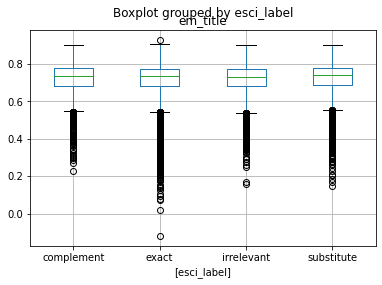

In [ ]:
visual_data.boxplot(column=['em_title'], by=['esci_label'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


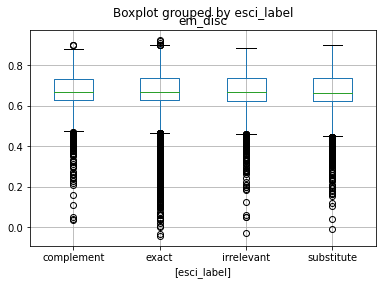

In [ ]:
visual_data.boxplot(column=['em_disc'], by=['esci_label']) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


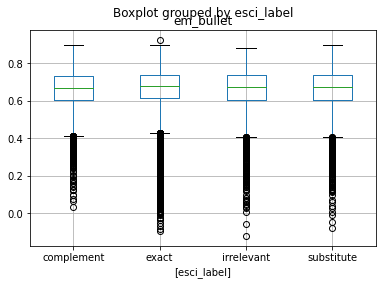

In [ ]:
visual_data.boxplot(column=['em_bullet'], by=['esci_label'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


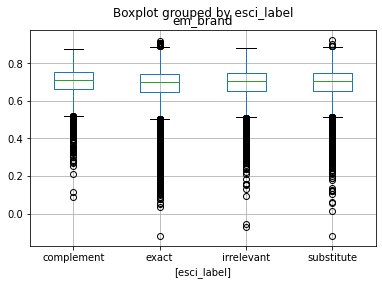

In [ ]:
visual_data.boxplot(column=['em_brand'], by=['esci_label'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


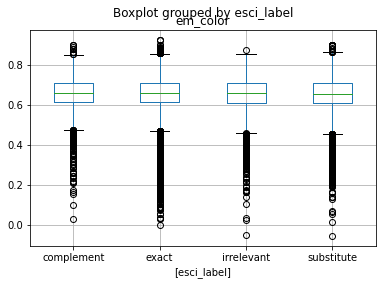

In [ ]:
visual_data.boxplot(column=['em_color'], by=['esci_label'])

## Model

split train test

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X=es_whole_df[["em_title","em_disc","em_bullet","em_brand","em_color"]]
y=es_whole_df[["esci_label"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
yhat = rf.predict(X_test)
accuracy_score(y_test, yhat)

0.7100625

In [ ]:
f1_score(y_test, yhat,average='weighted')

0.5896728966412046

linear regression

In [ ]:
#from sklearn.linear_model import 

In [ ]:
#reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#yhat = reg.predict(X_test)
#accuracy_score(y_test, yhat)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)
yhat = knn.predict(X_test)
accuracy_score(y_test, yhat)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6775625

In [ ]:
knn

In [ ]:
f1_score(y_test, yhat,average='weighted')

0.5958831336420268

SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC().fit(X_train, y_train)
yhat = svm.predict(X_test)
accuracy_score(y_test, yhat)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7100625

In [ ]:
f1_score(y_test, yhat,average='weighted')

0.5896728966412046